# House Price Prediction - Advanced Regression

### About the Company

Surprise Housing is a US-based housing company. They have decided to enter the Australian housing market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Assignment Goal :

The company wants to know :

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

### Business Goal :

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Input :

1. Train.csv file which contains the previous sale of houses in Australia
2. Data_description.txt which contains the meta data information of train.csv file

### 1. Reading Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import statsmodels.api as sm
import missingno as msgno

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

### 2. EDA – Exploratory Data Analysis

#### 2.1 Reading Data

In [2]:
housing_df = pd.read_csv(r"C:\Users\akshay.kachroo\Downloads\train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
#Analyse the data set
print(housing_df.shape)
housing_df.describe()

(1460, 81)


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4]:
#Analyse the data set
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#check any columns having missing values
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
#Looks like there are many columns with missing values.
pd.options.display.max_rows = 1000
round(housing_df.isnull().sum()/len(housing_df.index)*100,2).sort_values()

Id                0.00
TotalBsmtSF       0.00
Heating           0.00
SaleCondition     0.00
CentralAir        0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
PoolArea          0.00
ScreenPorch       0.00
BsmtUnfSF         0.00
3SsnPorch         0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageArea        0.00
GarageCars        0.00
Fireplaces        0.00
EnclosedPorch     0.00
BsmtFinSF2        0.00
HeatingQC         0.00
SalePrice         0.00
Utilities         0.00
LandContour       0.00
Neighborhood      0.00
Condition1        0.00
LotShape          0.00
Street            0.00
LotArea           0.00
BsmtFinSF1 

In [7]:
#Dropping values with more than 90% null values
housing_df.drop(['Alley','MiscFeature','PoolQC'],axis=1,inplace = True)

In [8]:
#LotFrontage has NaN values. replace it with 0
housing_df['LotFrontage'].fillna('0', inplace = True)

##### Handling the Categorical Columns

In [9]:
#checking the columns of datatype = object, if the variabls contain more than 0 null values.

housing_df.select_dtypes(include = "object").isnull().sum()[housing_df.select_dtypes(include = "object").isnull().sum()>0]

MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [10]:
#storing all the categorical variables in one variable
null_columns = ('MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond' )


#replacing all the unwanted null values as "na"
for col in null_columns:
    housing_df[col]=housing_df[col].fillna('na')
    
housing_df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL        65.0     8450   Pave      Reg         Lvl   
1   2          20       RL        80.0     9600   Pave      Reg         Lvl   
2   3          60       RL        68.0    11250   Pave      IR1         Lvl   
3   4          70       RL        60.0     9550   Pave      IR1         Lvl   
4   5          60       RL        84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea Fence MiscVal  \
0    AllPub    Inside  ...         0           0        0   NaN       0   
1    AllPub       FR2  ...         0           0        0   NaN       0   
2    AllPub    Inside  ...         0           0        0   NaN       0   
3    AllPub    Corner  ...         0           0        0   NaN       0   
4    AllPub       FR2  ...         0           0        0   NaN       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 78 columns]

In [11]:
#checking is there any categorical variable left to be analysed 

missingval = round(100*(housing_df.isnull().sum()/len(housing_df.Id)), 2)
missingval.loc[missingval > 0]

MasVnrArea      0.55
GarageYrBlt     5.55
Fence          80.75
dtype: float64

Removing the columns which has more than 80% na values as these values will be skewed at one side, so dropping such columns will bring more accurate results. 

In [12]:
housing_df.drop(['Fence'],axis=1,inplace = True)
housing_df.drop(['Id'],axis=1,inplace = True)

##### Handling the Numerical Columns

In [13]:
#checking the status of the null values in the numerical variables

housing_df.select_dtypes(include = ["float","int64"]).isnull().sum()[housing_df.select_dtypes(include = ["float","int64"]).isnull().sum()>0]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [14]:
#checking individual column - MasVnrArea for its value counts

housing_df.MasVnrArea.value_counts().sort_values()

MasVnrArea
123.0       1
64.0        1
481.0       1
651.0       1
333.0       1
415.0       1
114.0       1
567.0       1
922.0       1
359.0       1
451.0       1
621.0       1
788.0       1
342.0       1
86.0        1
632.0       1
361.0       1
541.0       1
142.0       1
290.0       1
127.0       1
56.0        1
365.0       1
1600.0      1
34.0        1
31.0        1
299.0       1
315.0       1
348.0       1
46.0        1
41.0        1
399.0       1
102.0       1
36.0        1
254.0       1
604.0       1
297.0       1
506.0       1
27.0        1
150.0       1
391.0       1
228.0       1
24.0        1
571.0       1
230.0       1
450.0       1
975.0       1
151.0       1
32.0        1
766.0       1
81.0        1
274.0       1
337.0       1
731.0       1
603.0       1
408.0       1
1047.0      1
96.0        1
63.0        1
53.0        1
554.0       1
234.0       1
88.0        1
1378.0      1
165.0       1
122.0       1
428.0       1
796.0       1
410.0       1
218.0       1
163.0    

In [15]:
#checking individual column - MasVnrArea for its value counts

housing_df.GarageYrBlt.value_counts().sort_values()

GarageYrBlt
1933.0     1
1927.0     1
1908.0     1
1906.0     1
1900.0     1
1929.0     2
1914.0     2
1934.0     2
1918.0     2
1915.0     2
1942.0     2
1937.0     2
1947.0     2
1910.0     3
2010.0     3
1932.0     3
1923.0     3
1938.0     3
1921.0     3
1924.0     3
1952.0     3
1946.0     4
1935.0     4
1928.0     4
1982.0     4
1945.0     4
1931.0     4
1922.0     5
1916.0     5
1936.0     5
1951.0     6
1986.0     6
1926.0     6
1983.0     7
1930.0     8
1949.0     8
1984.0     8
1939.0     9
1991.0     9
1975.0     9
1941.0    10
1989.0    10
1981.0    10
1985.0    10
1925.0    10
1987.0    11
1948.0    11
1953.0    12
1955.0    13
1961.0    13
1992.0    13
1971.0    13
1940.0    14
1972.0    14
1920.0    14
1988.0    14
1973.0    14
1967.0    15
1969.0    15
1979.0    15
1980.0    15
1956.0    16
1963.0    16
1990.0    16
1959.0    17
1995.0    18
1994.0    18
1964.0    18
1974.0    18
1997.0    19
1960.0    19
1954.0    19
1978.0    19
1970.0    20
2001.0    20
1957.0    20


In [16]:
#impute the null values with median values for MasVnrArea columns as this shows the max and min values

housing_df['MasVnrArea'] = housing_df['MasVnrArea'].replace(np.nan, housing_df['MasVnrArea'].median())

In [17]:
#setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housing_df['GarageYrBlt']= housing_df['GarageYrBlt'].fillna(0)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(int)

In [18]:
housing_df.head()

MSSubClass MSZoning LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL        65.0     8450   Pave      Reg         Lvl   
1          20       RL        80.0     9600   Pave      Reg         Lvl   
2          60       RL        68.0    11250   Pave      IR1         Lvl   
3          70       RL        60.0     9550   Pave      IR1         Lvl   
4          60       RL        84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

#### 2.2 Data Visualization

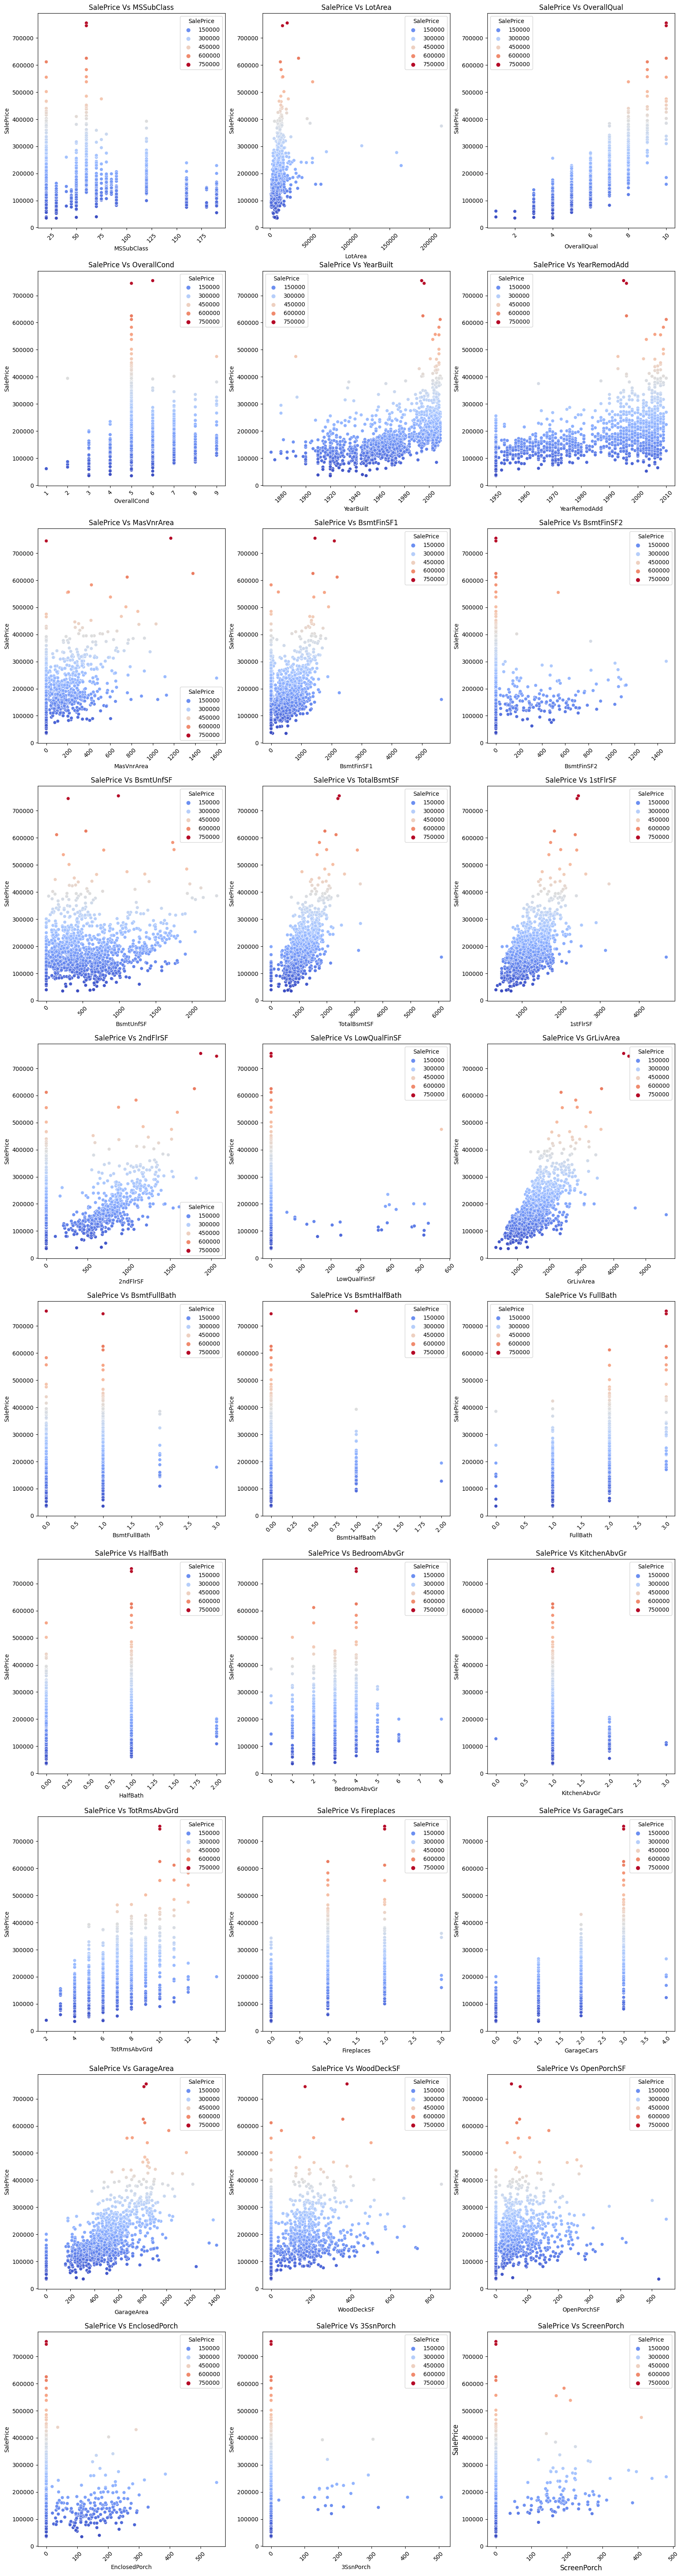

In [19]:
#Univariate Analysis
num_housing_df = housing_df.select_dtypes(include=['int64','float64'])
fig,ax = plt.subplots(10,3,figsize=(20,80))
for i,ax in zip(num_housing_df.columns,ax.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_housing_df,ax=ax,palette='coolwarm')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('SalePrice'+' Vs '+str(i))

#### Outlier Treatment

In [20]:
def QuantileCap(input, lowCap, highCap):
    low_percentile = np.percentile(input, lowCap)
    high_percentile = np.percentile(input, highCap)
    input = np.where(input > high_percentile, high_percentile, input)
    out = (np.where(input < low_percentile, low_percentile, input))
    return out

In [21]:
for i in num_housing_df.columns:
    num_housing_df[i] = QuantileCap(num_housing_df[i], 10, 90)

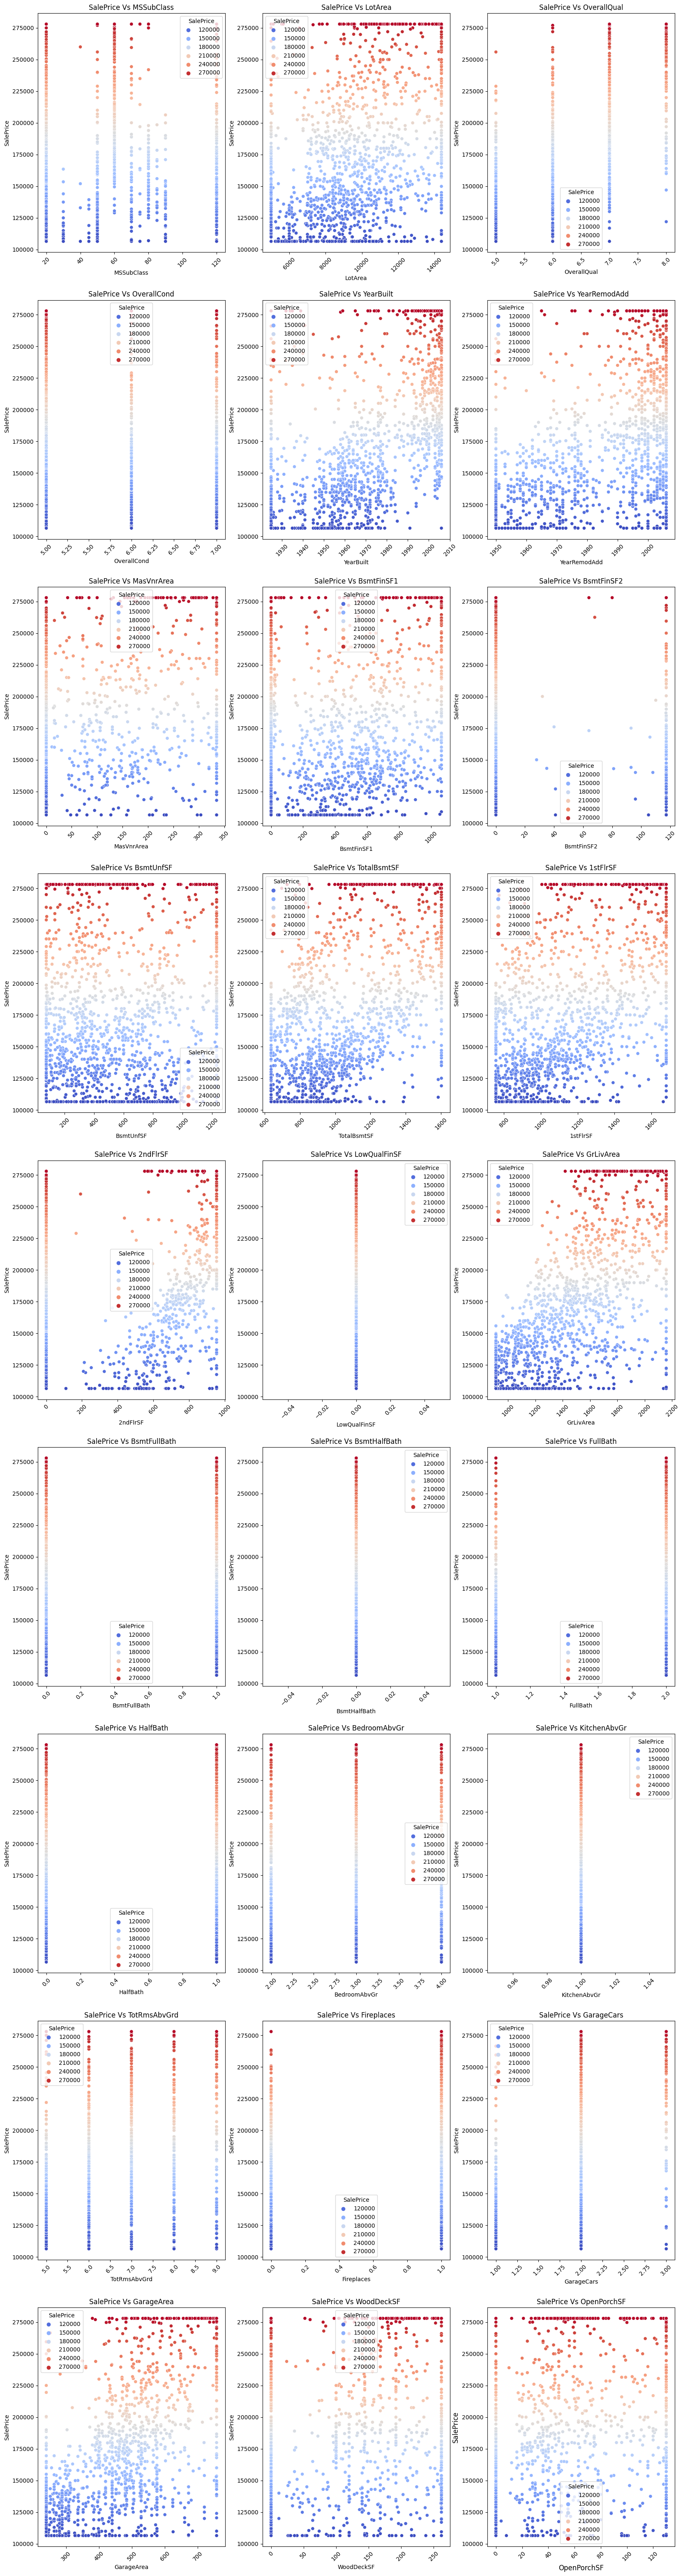

In [22]:
fig,ax = plt.subplots(9,3,figsize=(20,80))
for i,ax in zip(num_housing_df.columns,ax.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_housing_df,ax=ax,palette='coolwarm')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('SalePrice'+' Vs '+str(i))

In [23]:
housing_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [24]:
cat_columns = housing_df.select_dtypes(include=['object']).columns

In [25]:
housing_df.select_dtypes(include=['object']).columns.size

40

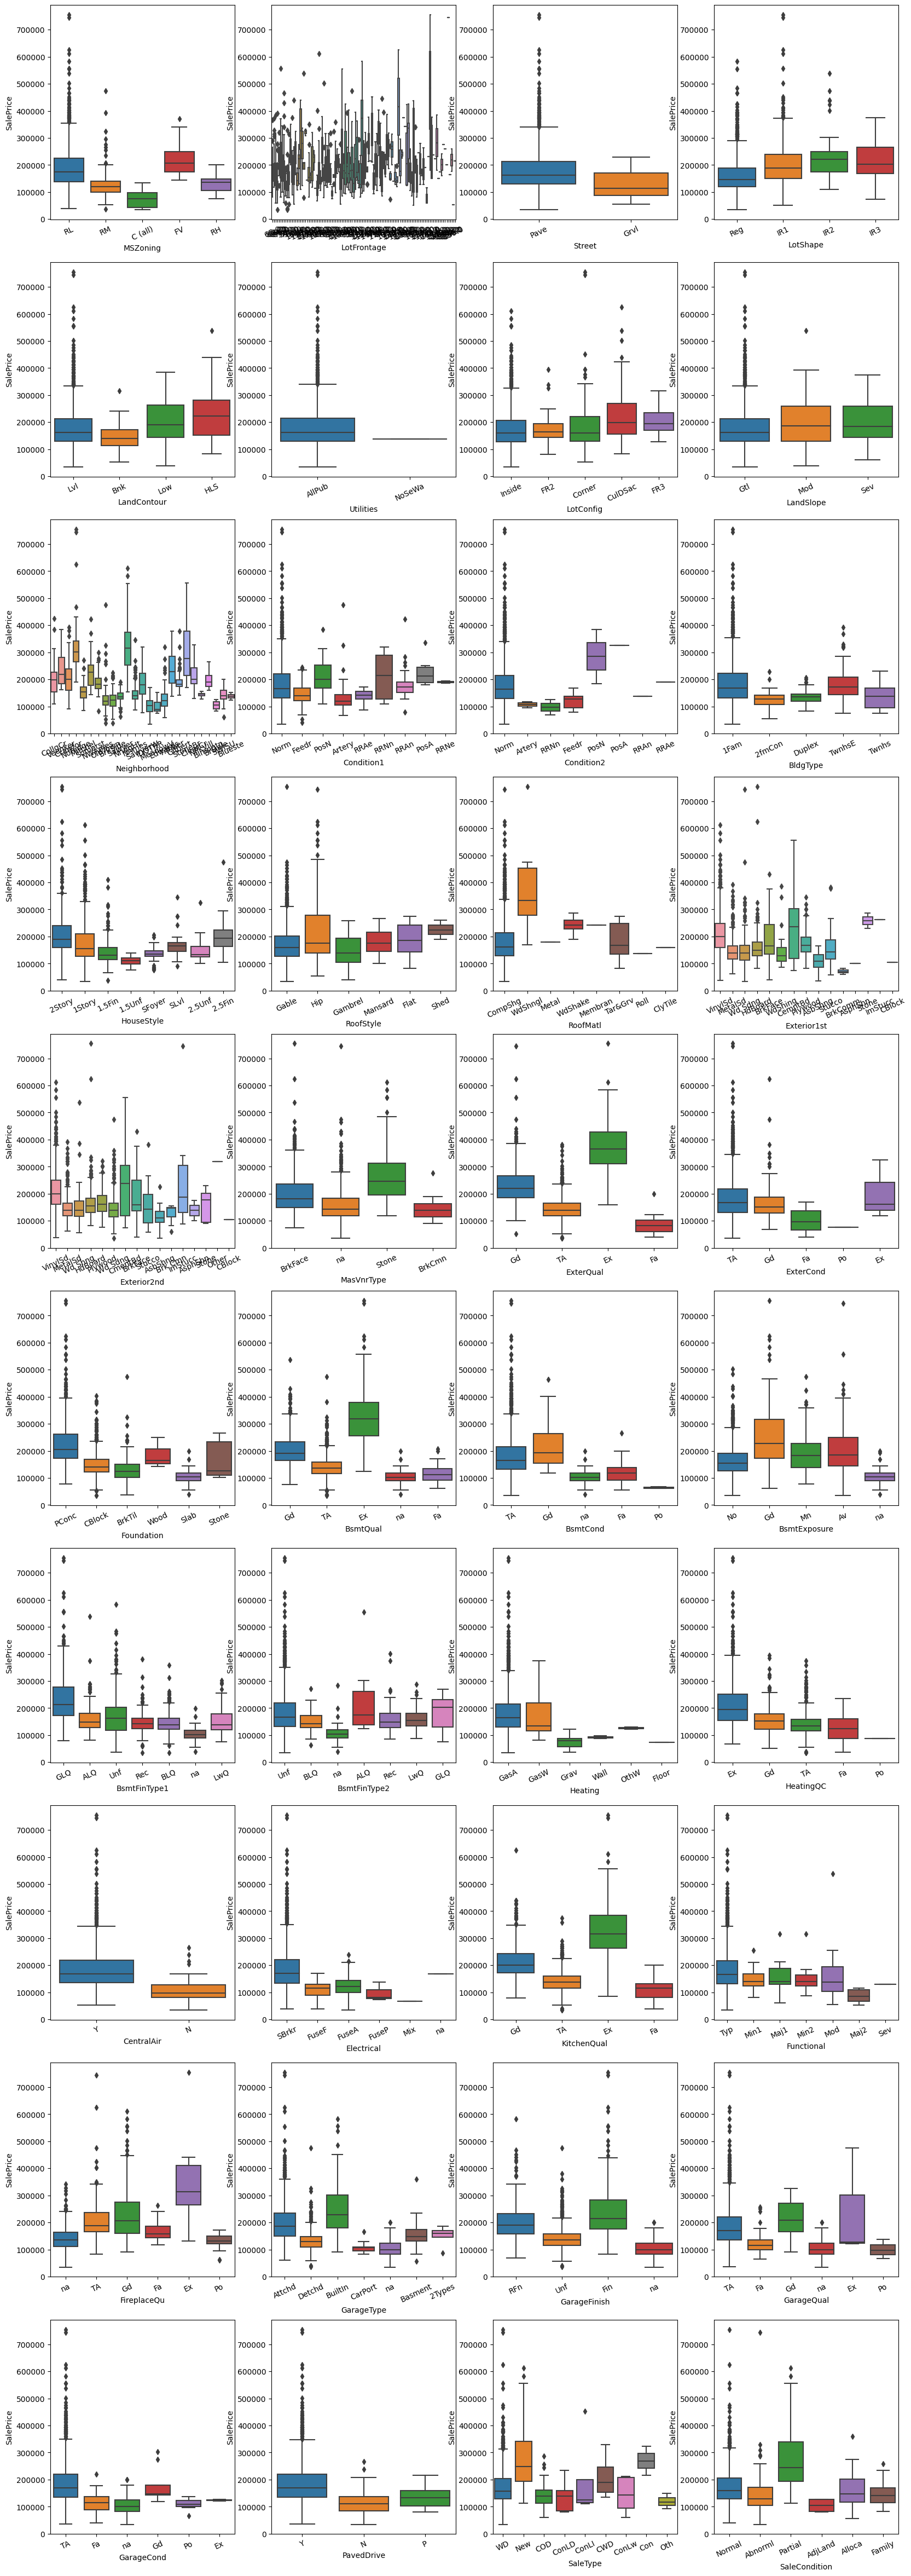

In [26]:
# visualizing dataset - categorical varibles 
plt.figure(figsize=(20,60))

row_num = 1
for i in cat_columns:
    plt.subplot(10,4,row_num)
    row_num = row_num +1
    sns.boxplot(x= i, y='SalePrice', data= housing_df)
    plt.xticks(rotation = 25, size=10)
    plt.yticks(size=10)
plt.show()

### 3. Test Train Split

In [27]:
# continuous variable list
Con_Var = list(housing_df.select_dtypes(["int64","float64"]).columns)

In [28]:
# categorical variable list
Cat_Var = list(housing_df.select_dtypes("object").columns)

In [29]:
# create dummy variables for categorical variables

Cat_Var_df = pd.get_dummies(data=housing_df[Cat_Var], drop_first=True)
Con_Var_df = housing_df[Con_Var]
Model_df = pd.concat([Cat_Var_df, Con_Var_df], axis=1)

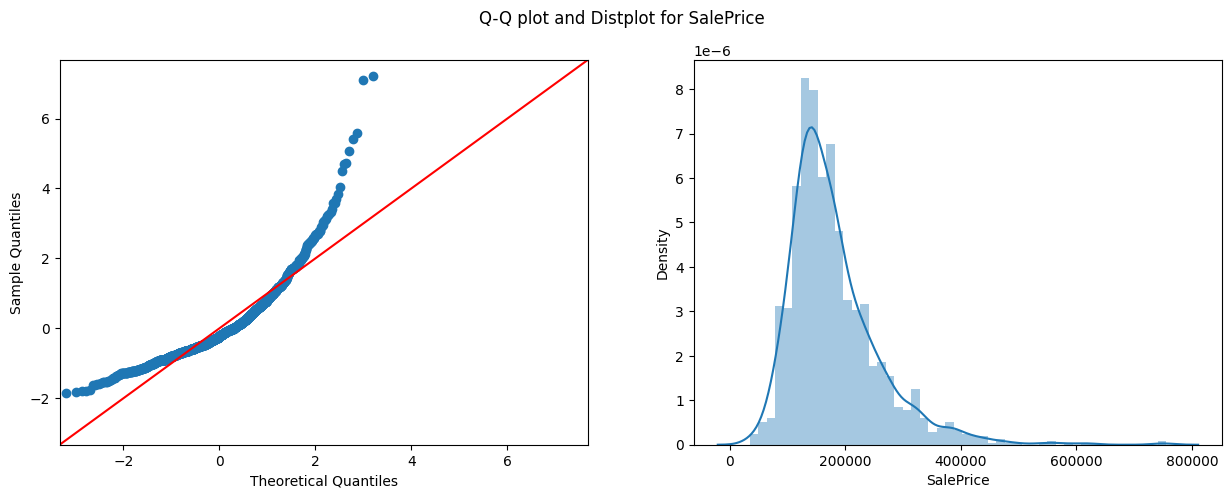

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Q-Q plot and Distplot for SalePrice")
sm.qqplot(data=Model_df["SalePrice"], fit=True, line="45", ax=ax[0])
sns.distplot(Model_df["SalePrice"], ax=ax[1])
plt.show()

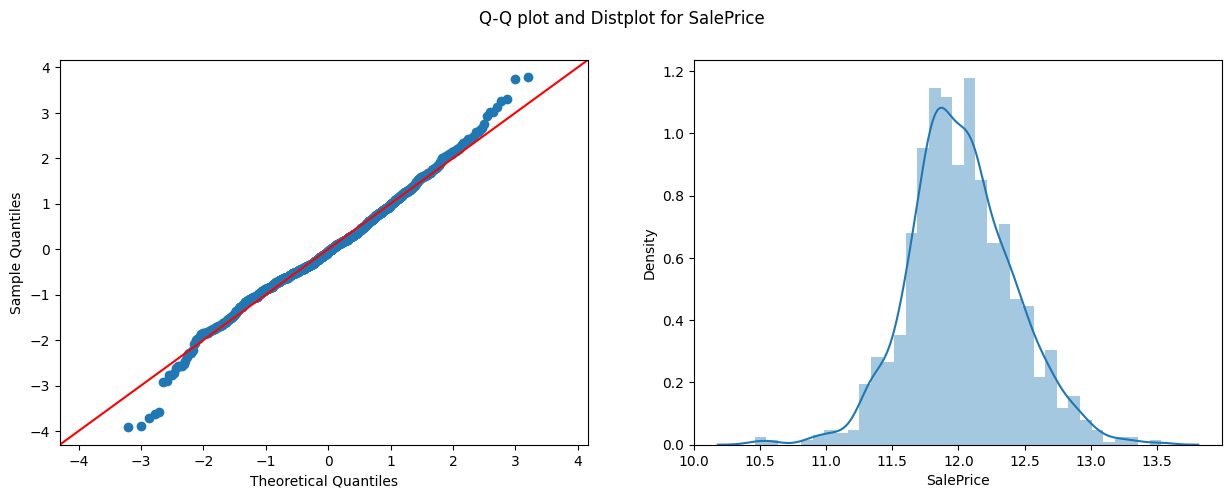

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Q-Q plot and Distplot for SalePrice")
sm.qqplot(data=np.log(Model_df["SalePrice"]), fit=True, line="45", ax=ax[0])
sns.distplot(np.log(Model_df["SalePrice"]), ax=ax[1])
plt.show()

#### Conclusion: Target is normalized usign log transformation

In [32]:
Model_df["SalePrice"] = np.log(Model_df["SalePrice"])

In [33]:
y = Model_df['SalePrice']
Model_df.drop(['SalePrice'],axis=1,inplace=True)

In [34]:
X = Model_df

In [35]:
#Split train and test data in 70-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 4 Model Building and evaluation

In [42]:
#Lets first try to build. the model using linear regression
#Since there are too many predictor variables, its better to use some automated technique to figure out final variables
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [43]:
#Now inspect the columns selected by RFE and their ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 2),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 3),
 ('LotFrontage_24.0', False, 105),
 ('LotFrontage_30.0', False, 104),
 ('LotFrontage_32.0', False, 112),
 ('LotFrontage_33.0', True, 1),
 ('LotFrontage_34.0', False, 49),
 ('LotFrontage_35.0', False, 25),
 ('LotFrontage_36.0', False, 114),
 ('LotFrontage_37.0', False, 47),
 ('LotFrontage_38.0', False, 66),
 ('LotFrontage_39.0', False, 48),
 ('LotFrontage_40.0', False, 125),
 ('LotFrontage_41.0', False, 63),
 ('LotFrontage_42.0', False, 14),
 ('LotFrontage_43.0', False, 91),
 ('LotFrontage_44.0', False, 67),
 ('LotFrontage_45.0', False, 164),
 ('LotFrontage_46.0', False, 9),
 ('LotFrontage_47.0', False, 126),
 ('LotFrontage_48.0', False, 52),
 ('LotFrontage_49.0', False, 22),
 ('LotFrontage_50.0', False, 113),
 ('LotFrontage_51.0', False, 60),
 ('LotFrontage_52.0', False, 124),
 ('LotFrontage_53.0', False, 107),
 ('LotFrontage_54.0', False, 50),
 ('LotFrontage_55.0', False, 72),

In [44]:
# predict using train data set
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9645506350533216

### 5.1 Ridge Regression

In [48]:
# list of alphas to tune
param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.041862      0.028901         0.004805        0.001317      0.0001   
1       0.020178      0.003964         0.001648        0.003296       0.001   
2       0.034795      0.007555         0.007626        0.001394        0.01   
3       0.040946      0.011799         0.005760        0.003896        0.05   
4       0.017227      0.005305         0.005071        0.004577         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.105544          -0.102111          -0.108991   
1   {'alpha': 0.001}          -0.104974          -0.101521          -0.108341   
2    {'alpha': 0.01}          -0.102770          -0.098773          -0.104685   
3    {'alpha': 0.05}          -0.101378          -0.096979          -0.101203   
4     {'alpha': 0.1}          -0.100764          -0.096166          -0.100374   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.093097  ...        -0.100655        0.006378               27   
1          -0.092827  ...        -0.100151        0.006255               26   
2          -0.091056  ...        -0.097531        0.005888               25   
3          -0.087173  ...        -0.094684        0.006526               23   
4          -0.085297  ...        -0.093603        0.006924               22   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.048457           -0.049917           -0.049926   
1           -0.048480           -0.049929           -0.049955   
2           -0.048721           -0.050106           -0.050224   
3           -0.049948           -0.050751           -0.051317   
4           -0.051294           -0.051401           -0.052403   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.051922           -0.050176         -0.050080         0.001103  
1           -0.051934           -0.050193         -0.050098         0.001100  
2           -0.052198           -0.050499         -0.050350         0.001111  
3           -0.053248           -0.051802         -0.051413         0.001106  
4           -0.054475           -0.053234         -0.052562         0.001191  

[5 rows x 21 columns]

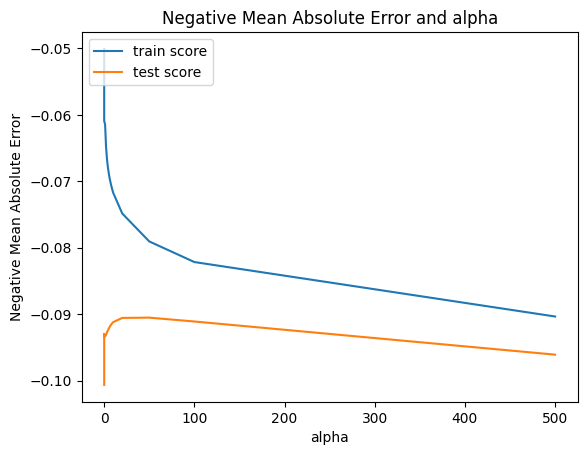

In [50]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### By the plot we can see that the optimal value of alpha is 20, the train score and test score combination score is highest at this point.

In [51]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.64590295e-02,  1.85020261e-02,  4.64461052e-02, -6.75971606e-03,
       -4.09578633e-03, -6.47188526e-03,  2.84838952e-03,  0.00000000e+00,
        6.34747501e-03,  3.99899701e-03, -7.25006831e-03, -4.50532539e-03,
        1.97980605e-03,  3.63801007e-03, -4.70092212e-03, -3.93262026e-03,
        1.49573967e-02, -2.68134787e-02, -5.22809512e-03, -1.05320433e-02,
       -8.63161542e-04,  8.22743311e-04,  5.35968819e-03,  1.37269826e-02,
       -1.73805781e-02, -9.16049060e-03, -2.04429740e-02, -1.80380264e-02,
        8.53491461e-03,  2.61415785e-02,  5.53192913e-03,  6.10154448e-03,
       -2.00578953e-02,  1.59523500e-03, -1.21952441e-02,  1.10872463e-02,
        8.13628247e-03, -1.18456337e-02,  1.83587106e-02, -4.45401902e-03,
        2.42260606e-03, -2.96349957e-03, -8.30976906e-03,  2.26446242e-02,
       -4.21829076e-04, -1.16238790e-02,  6.23714335e-03, -1.46168466e-02,
        1.79227376e-03,  3.10548645e-02,  4.67159593e-04,  3.83684390e-03,
        7.56350762e-03, -

### Model Evaluation

In [52]:
from sklearn import linear_model, metrics

In [53]:
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9186751505193436
0.8858551861646238


### 5.2 Lasso Regression

In [54]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.184449      0.030869         0.004524        0.003704      0.0001   
1       0.065422      0.019581         0.005358        0.002356       0.001   
2       0.025304      0.005374         0.002644        0.003422        0.01   
3       0.125052      0.029005         0.001269        0.001644        0.05   
4       0.086060      0.017937         0.003592        0.002009         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088581          -0.092195          -0.091815   
1   {'alpha': 0.001}          -0.085015          -0.095073          -0.093002   
2    {'alpha': 0.01}          -0.097657          -0.105604          -0.105860   
3    {'alpha': 0.05}          -0.104354          -0.119120          -0.118151   
4     {'alpha': 0.1}          -0.111745          -0.125946          -0.125836   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.076816  ...        -0.084943        0.007374                1   
1          -0.076127  ...        -0.086152        0.007065                2   
2          -0.089796  ...        -0.098805        0.006199                3   
3          -0.103466  ...        -0.109716        0.007296                4   
4          -0.112649  ...        -0.117798        0.006618                8   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.055554           -0.055213           -0.055993   
1           -0.077529           -0.071457           -0.071862   
2           -0.098302           -0.088229           -0.092878   
3           -0.107872           -0.100608           -0.103485   
4           -0.117099           -0.105894           -0.111221   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.057599           -0.056798         -0.056231         0.000865  
1           -0.076862           -0.076527         -0.074847         0.002626  
2           -0.099174           -0.097387         -0.095194         0.004103  
3           -0.108825           -0.107913         -0.105741         0.003169  
4           -0.117333           -0.117346         -0.113779         0.004584  

[5 rows x 21 columns]

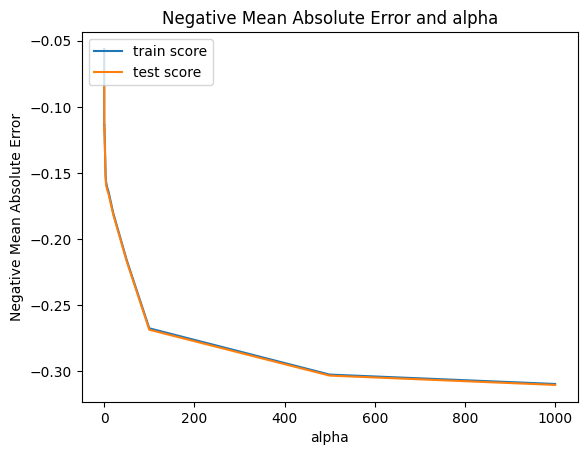

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### By the plot we can see that the optimal value of alpha is 0, the train score and test score combination score is highest at this point.

In [57]:
alpha =0
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0)

#### Model Evaluation

In [58]:
# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9645492364752534
0.740194949165252


In [59]:
#Features and coefficient in one dataframe
df_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
df_lasso = df_lasso[df_lasso['Coefficient'] != 0.00]

df_lasso.sort_values('Coefficient', axis=0, ascending=False, inplace=True)
df_lasso

Features  Coefficient
182         RoofStyle_Shed       0.4710
0              MSZoning_FV       0.4553
1              MSZoning_RH       0.4460
2              MSZoning_RL       0.4434
3              MSZoning_RM       0.4044
16        LotFrontage_42.0       0.3745
184       RoofMatl_Membran       0.3477
109      LotFrontage_168.0       0.3457
262           Heating_Wall       0.3277
111      LotFrontage_182.0       0.3220
28        LotFrontage_54.0       0.3123
83       LotFrontage_109.0       0.2958
259           Heating_GasW       0.2801
88       LotFrontage_115.0       0.2795
103      LotFrontage_144.0       0.2791
43        LotFrontage_69.0       0.2782
65        LotFrontage_91.0       0.2749
58        LotFrontage_84.0       0.2702
84       LotFrontage_110.0       0.2619
35        LotFrontage_61.0       0.2589
239            BsmtCond_Po       0.2587
79       LotFrontage_105.0       0.2555
38        LotFrontage_64.0       0.2545
23        LotFrontage_49.0       0.2544
74       LotFrontage_100.0       0.2527
63        LotFrontage_89.0       0.2491
55        LotFrontage_81.0       0.2484
81       LotFrontage_107.0       0.2467
108      LotFrontage_160.0       0.2421
40        LotFrontage_66.0       0.2398
94       LotFrontage_124.0       0.2393
9         LotFrontage_35.0       0.2321
29        LotFrontage_55.0       0.2314
96       LotFrontage_129.0       0.2292
49        LotFrontage_75.0       0.2291
70        LotFrontage_96.0       0.2289
62        LotFrontage_88.0       0.2287
97       LotFrontage_130.0       0.2276
258           Heating_GasA       0.2268
61        LotFrontage_87.0       0.2263
50        LotFrontage_76.0       0.2254
22        LotFrontage_48.0       0.2245
110      LotFrontage_174.0       0.2243
56        LotFrontage_82.0       0.2238
57        LotFrontage_83.0       0.2217
98       LotFrontage_134.0       0.2215
30        LotFrontage_56.0       0.2207
310         SaleType_ConLD       0.2200
36        LotFrontage_62.0       0.2185
31        LotFrontage_57.0       0.2173
76       LotFrontage_102.0       0.2172
104      LotFrontage_149.0       0.2161
12        LotFrontage_38.0       0.2133
54        LotFrontage_80.0       0.2128
52        LotFrontage_78.0       0.2122
33        LotFrontage_59.0       0.2117
48        LotFrontage_74.0       0.2101
92       LotFrontage_121.0       0.2100
44        LotFrontage_70.0       0.2098
102      LotFrontage_141.0       0.2095
82       LotFrontage_108.0       0.2092
66        LotFrontage_92.0       0.2052
113          LotFrontage_0       0.2051
53        LotFrontage_79.0       0.2050
39        LotFrontage_65.0       0.2041
8         LotFrontage_34.0       0.2033
46        LotFrontage_72.0       0.2020
34        LotFrontage_60.0       0.1976
72        LotFrontage_98.0       0.1957
261           Heating_OthW       0.1950
162        Condition2_PosA       0.1945
25        LotFrontage_51.0       0.1943
93       LotFrontage_122.0       0.1942
20        LotFrontage_46.0       0.1915
80       LotFrontage_106.0       0.1913
260           Heating_Grav       0.1885
37        LotFrontage_63.0       0.1869
41        LotFrontage_67.0       0.1830
89       LotFrontage_116.0       0.1823
51        LotFrontage_77.0       0.1820
87       LotFrontage_114.0       0.1809
91       LotFrontage_120.0       0.1783
11        LotFrontage_37.0       0.1781
78       LotFrontage_104.0       0.1766
73        LotFrontage_99.0       0.1744
192    Exterior1st_BrkFace       0.1733
42        LotFrontage_68.0       0.1730
68        LotFrontage_94.0       0.1727
64        LotFrontage_90.0       0.1714
21        LotFrontage_47.0       0.1699
199      Exterior1st_Stone       0.1691
185         RoofMatl_Metal       0.1683
75       LotFrontage_101.0       0.1682
45        LotFrontage_71.0       0.1677
67        LotFrontage_93.0       0.1668
24        LotFrontage_50.0       0.1662
17        LotFrontage_43.0       0.1660
99       LotFrontage_137.0       0.1633
90       LotFrontage_118.0       0.1632
47        LotFront

In [60]:
#coefficient dictionary
coeff_lasso_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
coeff_lasso_dict

{'MSZoning_FV': 0.0365,
 'MSZoning_RH': 0.0185,
 'MSZoning_RL': 0.0464,
 'MSZoning_RM': -0.0068,
 'LotFrontage_24.0': -0.0041,
 'LotFrontage_30.0': -0.0065,
 'LotFrontage_32.0': 0.0028,
 'LotFrontage_33.0': 0.0,
 'LotFrontage_34.0': 0.0063,
 'LotFrontage_35.0': 0.004,
 'LotFrontage_36.0': -0.0073,
 'LotFrontage_37.0': -0.0045,
 'LotFrontage_38.0': 0.002,
 'LotFrontage_39.0': 0.0036,
 'LotFrontage_40.0': -0.0047,
 'LotFrontage_41.0': -0.0039,
 'LotFrontage_42.0': 0.015,
 'LotFrontage_43.0': -0.0268,
 'LotFrontage_44.0': -0.0052,
 'LotFrontage_45.0': -0.0105,
 'LotFrontage_46.0': -0.0009,
 'LotFrontage_47.0': 0.0008,
 'LotFrontage_48.0': 0.0054,
 'LotFrontage_49.0': 0.0137,
 'LotFrontage_50.0': -0.0174,
 'LotFrontage_51.0': -0.0092,
 'LotFrontage_52.0': -0.0204,
 'LotFrontage_53.0': -0.018,
 'LotFrontage_54.0': 0.0085,
 'LotFrontage_55.0': 0.0261,
 'LotFrontage_56.0': 0.0055,
 'LotFrontage_57.0': 0.0061,
 'LotFrontage_58.0': -0.0201,
 'LotFrontage_59.0': 0.0016,
 'LotFrontage_60.0': -0.0

In [62]:
X_train_lasso = X_train[df_lasso.Features]

#linear regression
lm1 = LinearRegression()
lm1.fit(X_train_lasso, y_train)

#rfe
rfe = RFE(lm1, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

#function to get coefficient values
def find(x):
    return coeff_lasso_dict[x]

#assign top features to temp dataframe
lasso_temp = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_)), columns=['Features', 'rfe_support'])
lasso_temp = lasso_temp.loc[lasso_temp['rfe_support'] == True]
lasso_temp['Coefficient'] = lasso_temp['Features'].apply(find)

#top 10 features
lasso_temp = lasso_temp.sort_values(by=['Coefficient'], ascending=False)
lasso_temp = lasso_temp.head(10)
lasso_temp

Features  rfe_support  Coefficient
274       RoofMatl_WdShngl         True       0.0277
170  SaleCondition_Partial         True       0.0276
318       RoofMatl_CompShg         True       0.0203
129          RoofMatl_Roll         True       0.0043
6         RoofMatl_Membran         True       0.0042
91          RoofMatl_Metal         True       0.0031
187       RoofMatl_Tar&Grv         True       0.0015
145          GarageType_na         True       0.0006
302          GarageQual_na         True       0.0006
303          GarageCond_na         True       0.0006

### 6 Summary
#### Following the several points that tell us about the conclusion of Surprise Housing Price Prediction :

#### The target variable is : SalePrice
#### The optimal value of alpha predicted for:
####        Ridge Regression : 20
####        Lasso Regression : 0
#### The R-Squared value for Test data comes out to be for:
#### Ridge Regression : 0.88
#### Lasso Regression : 0.74

### 7 Conclusion
#### Following are the points that the company wants to know :

#### Which variables are significant in predicting the price of a house?

#### RoofMatl_WdShngl
#### SaleCondition_Partial
#### RoofMatl_CompShg
#### RoofMatl_Roll
#### RoofMatl_Membran
#### RoofMatl_Metal
#### RoofMatl_Tar&Grv
#### GarageType_na
#### GarageQual_na
#### GarageCond_na

#### How well those variables describe the price of a house?

#### RoofMatl_WdShngl is highly significant variable that describe the price of the house. Other top variables are well explained in the bar plot as shown above.

#### Determine the optimal value of lambda for ridge and lasso regression.

#### The optimal value of lambda predicted for ridge regression is : 20
#### The optimal value of lambda predicted for lasso regression is : 0